In [1]:
import sys
c_path = "/home/fforge/Stage-IA3D/scripts/"
sys.path.append(f"{c_path}/mutations")
sys.path.append(f"{c_path}/orca_predictions")
sys.path.append(f"{c_path}/orcanalyse")

import mutate_with_rdm as mm
import process_sequence as ps
import matrices as mat

import pandas as pd
import os

%matplotlib inline

# 

In [2]:
mutationfile = None
bedfile = "./resources/annotations/chr1_2_specific_ctcf_Bos.bed"
ref_fasta = "./resources/genome/Bos_taurus_chr1/sequence.fa"
mut_path = "./outputs/genome/mut_2_specific_CTCF_start_chr1_Bos_tau"
mutationtype = "shuffle"
nb_random = 5

# 

In [3]:
chrom = "chr1"
prediction_prefix = "mut_2_specific_CTCF_chr1_first_32Mb_Bos_tau"
resol_model = "32Mb"
mpos = 16_000_000
cool_resol = 128_000
strict=False,
padding_chr=None,
use_cuda=False,
use_memmapgenome=False
pred_path = "./outputs/predictions/Bos_taurus_chr1"
builder_path = "./outputs/matrices_builder/start_chr1_Bos"

# 

In [ ]:
mm.main(mutationfile=None, 
        bed=bedfile, 
        genome=ref_fasta, 
        path=mut_path,
        mutationtype=mutationtype,
        nb_random=nb_random)

# 

In [ ]:
data = []
repository = ["Wtd_mut"] + [f"Rdm_mut_{i}" for i in range (nb_random)]

for name in repository:
    ps.main(chrom=chrom,
            output_prefix=f"{prediction_prefix}_{name}",
            mutation=name,
            resol_model=resol_model,
            mpos=mpos,
            fasta=f"{mut_path}/{name}/sequence.fa",
            cool_resol=cool_resol,
            strict=strict,
            padding_chr=padding_chr,
            use_cuda=False,
            use_memmapgenome=use_memmapgenome,
            pred_path=pred_path)
    
    path = f"{pred_path}/{prediction_prefix}_{name}"
    
    l_resol = mat.extract_resol_asc(path)

    trace_path = f"{mut_path}/{name}/trace_{name}.csv"
    
    data.append([f"orcarun_{name}", 
                 f"{l_resol}", 
                 f"{pred_path}/{prediction_prefix}_{name}", 
                 f"{name}", 
                 f"{mut_path.split('/')[-1]}", 
                 f"MatrixView", 
                 f"{ref_fasta.split('/')[-2]}", 
                 f"OrcaMatrix", 
                 f"{trace_path}"])

head = ["name", "list_resol", "path", "gtype", "genome", "obj_type", "refgenome", "mtype", "trace_path"]

if builder_path:
    try:
        builder_path = os.path.abspath(builder_path)
        os.makedirs(builder_path, exist_ok=True)
        print(f"Directory ensured: {builder_path}")
        
        if os.path.exists(builder_path):
            print(f"Directory exists: {builder_path}")
        else:
            print(f"Directory does not exist: {builder_path}")
    except Exception as e:
        print(f"Error creating directory: {e}")
else:
    print("builder_path is not defined or is empty.")

df = pd.DataFrame(data,columns=head)
df.to_csv(f"{builder_path}/orcarun.csv", sep="\t", index=False, header=True)

ps.main(chrom=chrom,
        output_prefix="ref_orcarun",
        mutation="wt",
        resol_model=resol_model,
        mpos=mpos,
        fasta=ref_fasta,
        cool_resol=cool_resol,
        strict=strict,
        padding_chr=padding_chr,
        use_cuda=False,
        use_memmapgenome=use_memmapgenome,
        pred_path=pred_path)

ref_path = f"{pred_path}/ref_orcarun"
l_resol = mat.extract_resol_asc(ref_path)

data_ref = [f"orcarun_ref", 
            f"{l_resol}", 
            f"{pred_path}/ref_orcarun", 
            f"wt", 
            f"{ref_fasta.split('/')[-1]}", 
            f"MatrixView", 
            f"{ref_fasta.split('/')[-2]}", 
            f"OrcaMatrix",
            f"_"]


df_ref = pd.DataFrame([data_ref], columns=head)
df_ref.to_csv(f"{builder_path}/ref_orcarun.csv", sep="\t", index=False, header=True, mode='w')


2025-05-09 11:01:07,258 - INFO - Time taken to load genome: 0.00 seconds
2025-05-09 11:01:10,695 - INFO - Time taken to get encoded sequence: 3.24 seconds
/home/fforge/miniforge3/envs/orca_env/lib/python3.9/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
2025-05-09 11:01:15,713 - INFO - Time taken to load the ressources: 5.02 seconds
/home/fforge/miniforge3/envs/orca_env/lib/python3.9/site-packages/torch/_dynamo/eval_frame.py:745: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In

Directory ensured: /home/fforge/Stage-IA3D/notebooks/outputs/matrices_builder/start_chr1_Bos
Directory exists: /home/fforge/Stage-IA3D/notebooks/outputs/matrices_builder/start_chr1_Bos


2025-05-09 11:28:02,811 - INFO - Time taken to get encoded sequence: 3.17 seconds
2025-05-09 11:28:07,164 - INFO - Time taken to load the ressources: 4.35 seconds
/home/fforge/miniforge3/envs/orca_env/lib/python3.9/site-packages/torch/_dynamo/eval_frame.py:745: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
2025-05-09 11:32:18,793 - INFO - Time taken for predictions: 251.63 seconds
2025-05-09 11:32:19,352 - INFO - Total time taken by main: 259.71 seconds


# 

In [4]:
mat_comparisons = mat.build_CompareMatrices(filepathref=f"{builder_path}/ref_orcarun.csv", filepathcomp=f"{builder_path}/orcarun.csv")

FastaNotFoundError: Cannot read FASTA from file /home/fforge/Stage-IA3D/notebooks/Bos_taurus_chr1/sequence.fa

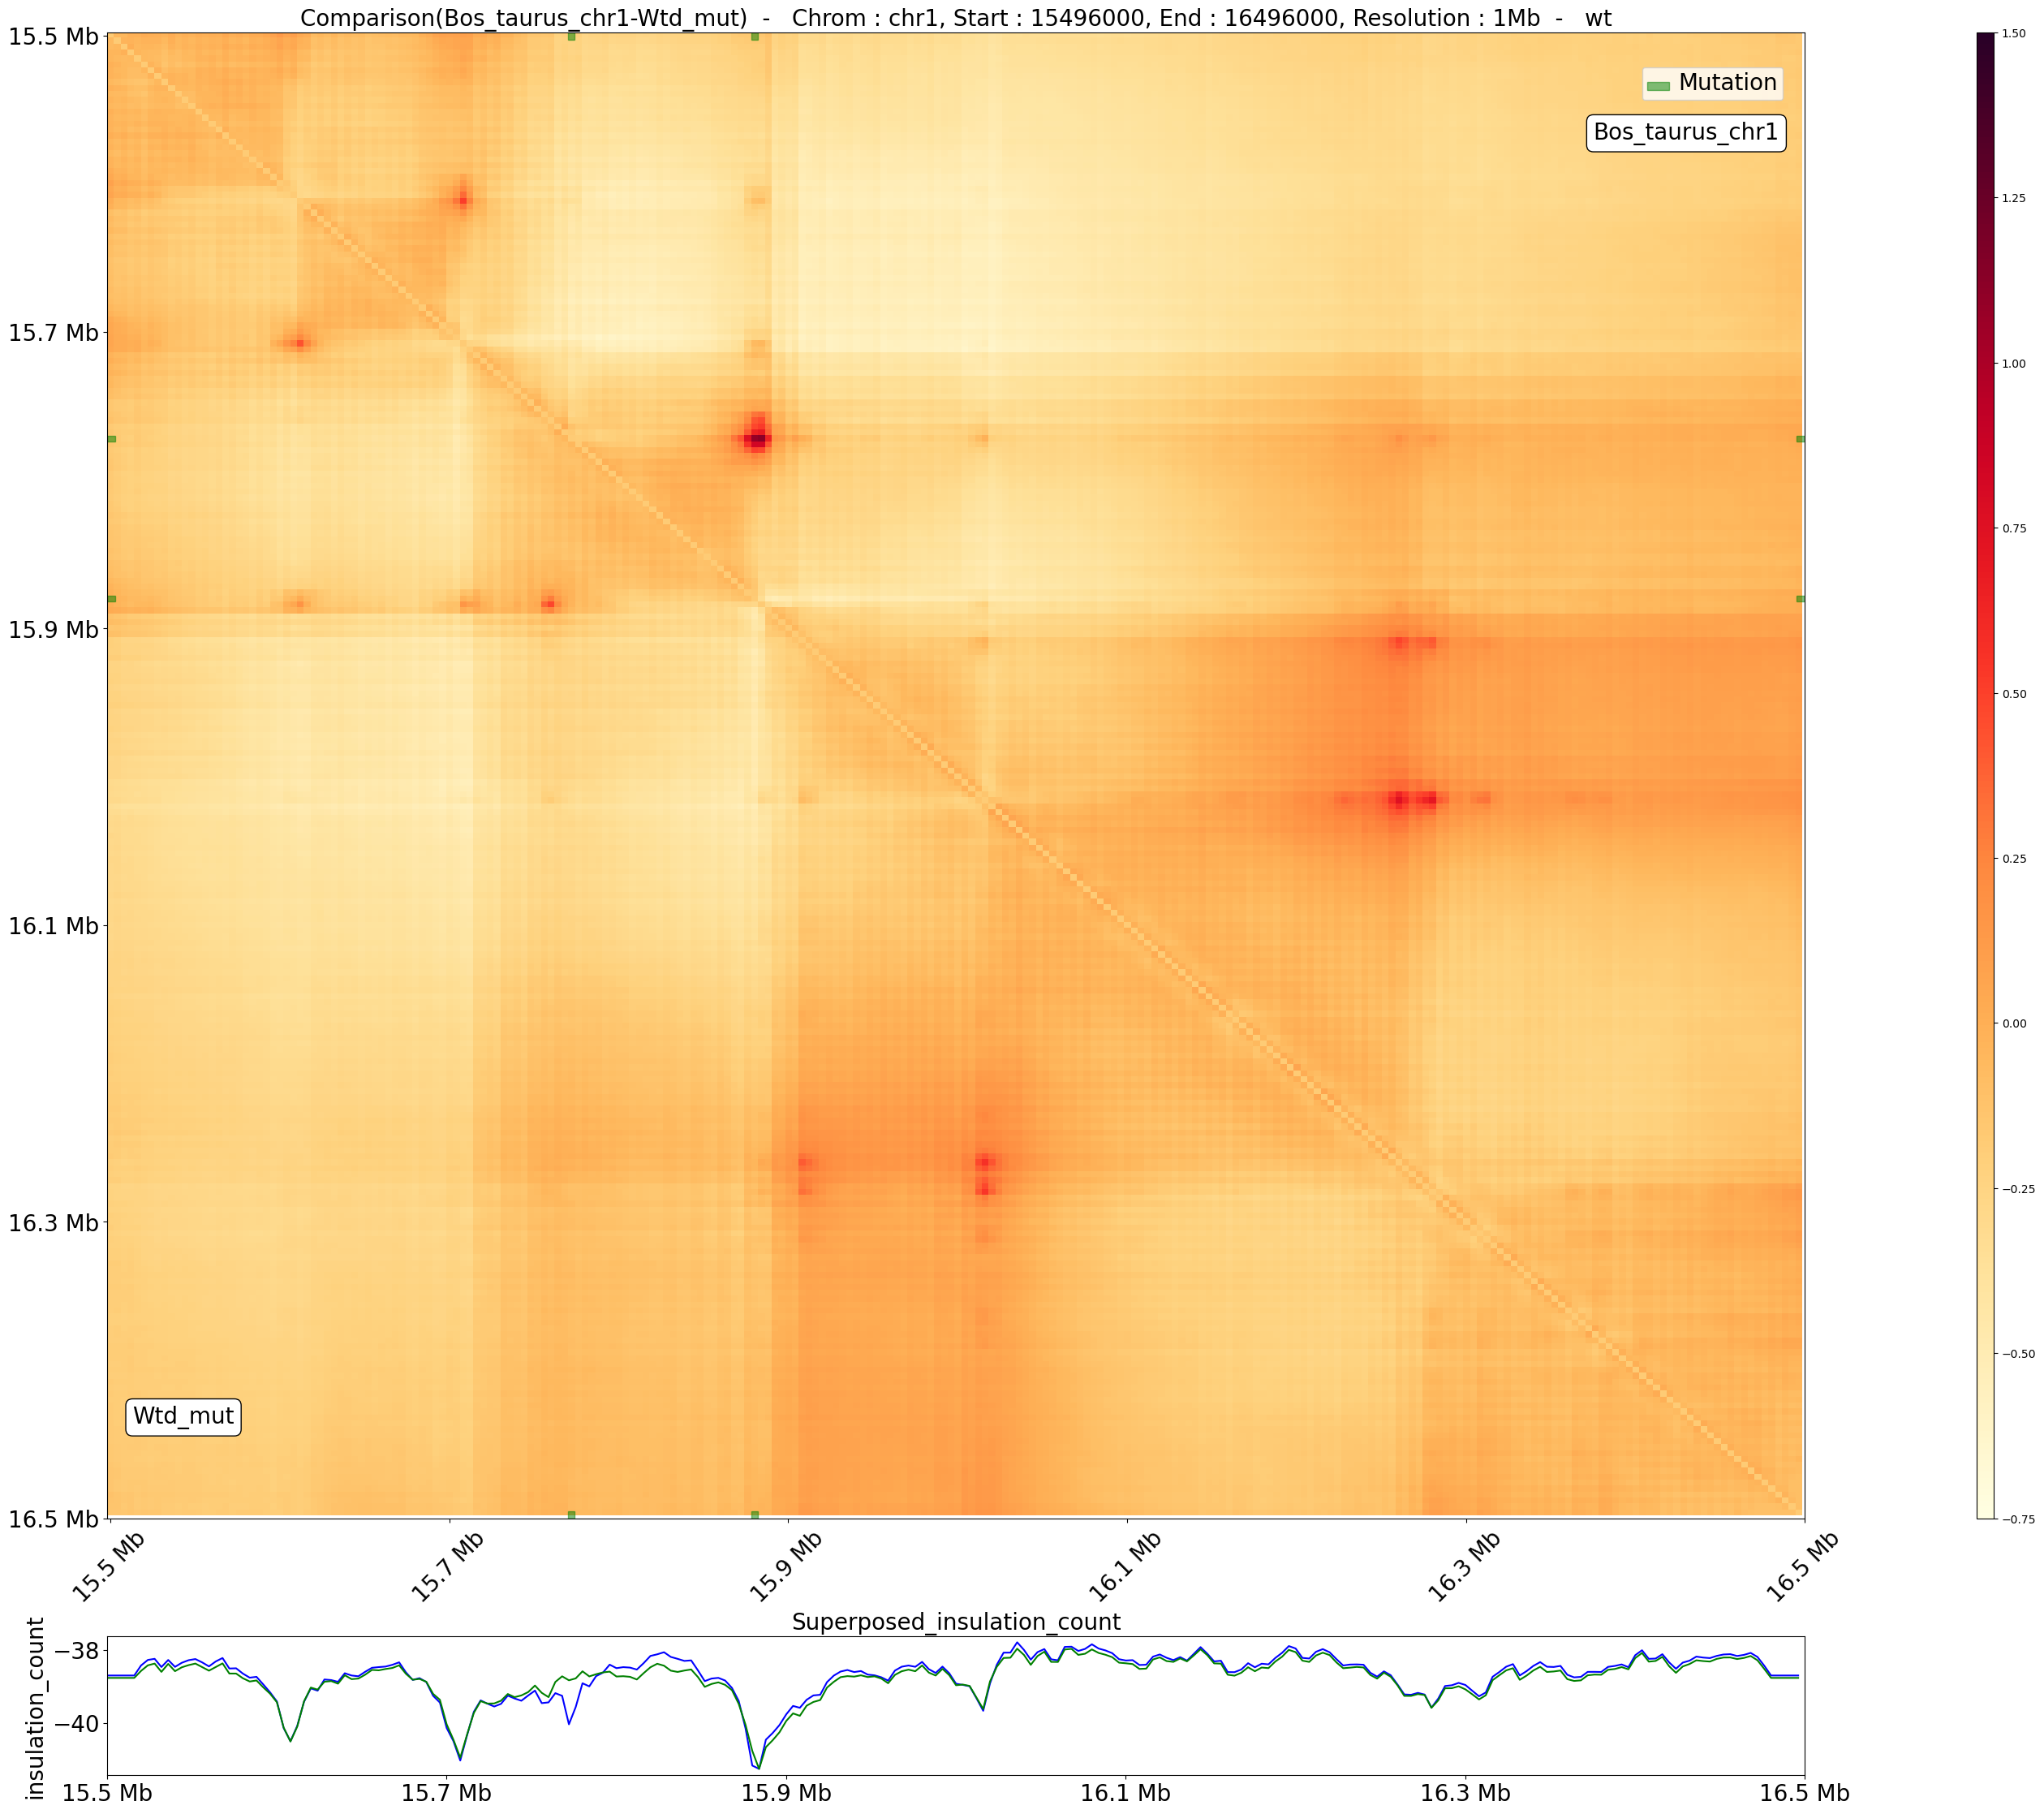

In [5]:
mat_comparisons.plot_2_matices_comp(_2_run=["ref", "orcarun_Wtd_mut"], resol="1Mb", mutation=True, comp_type="triangular", l_score_types=["insulation_count", "PC1"])

Wtd_mut_1Mb : [68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148

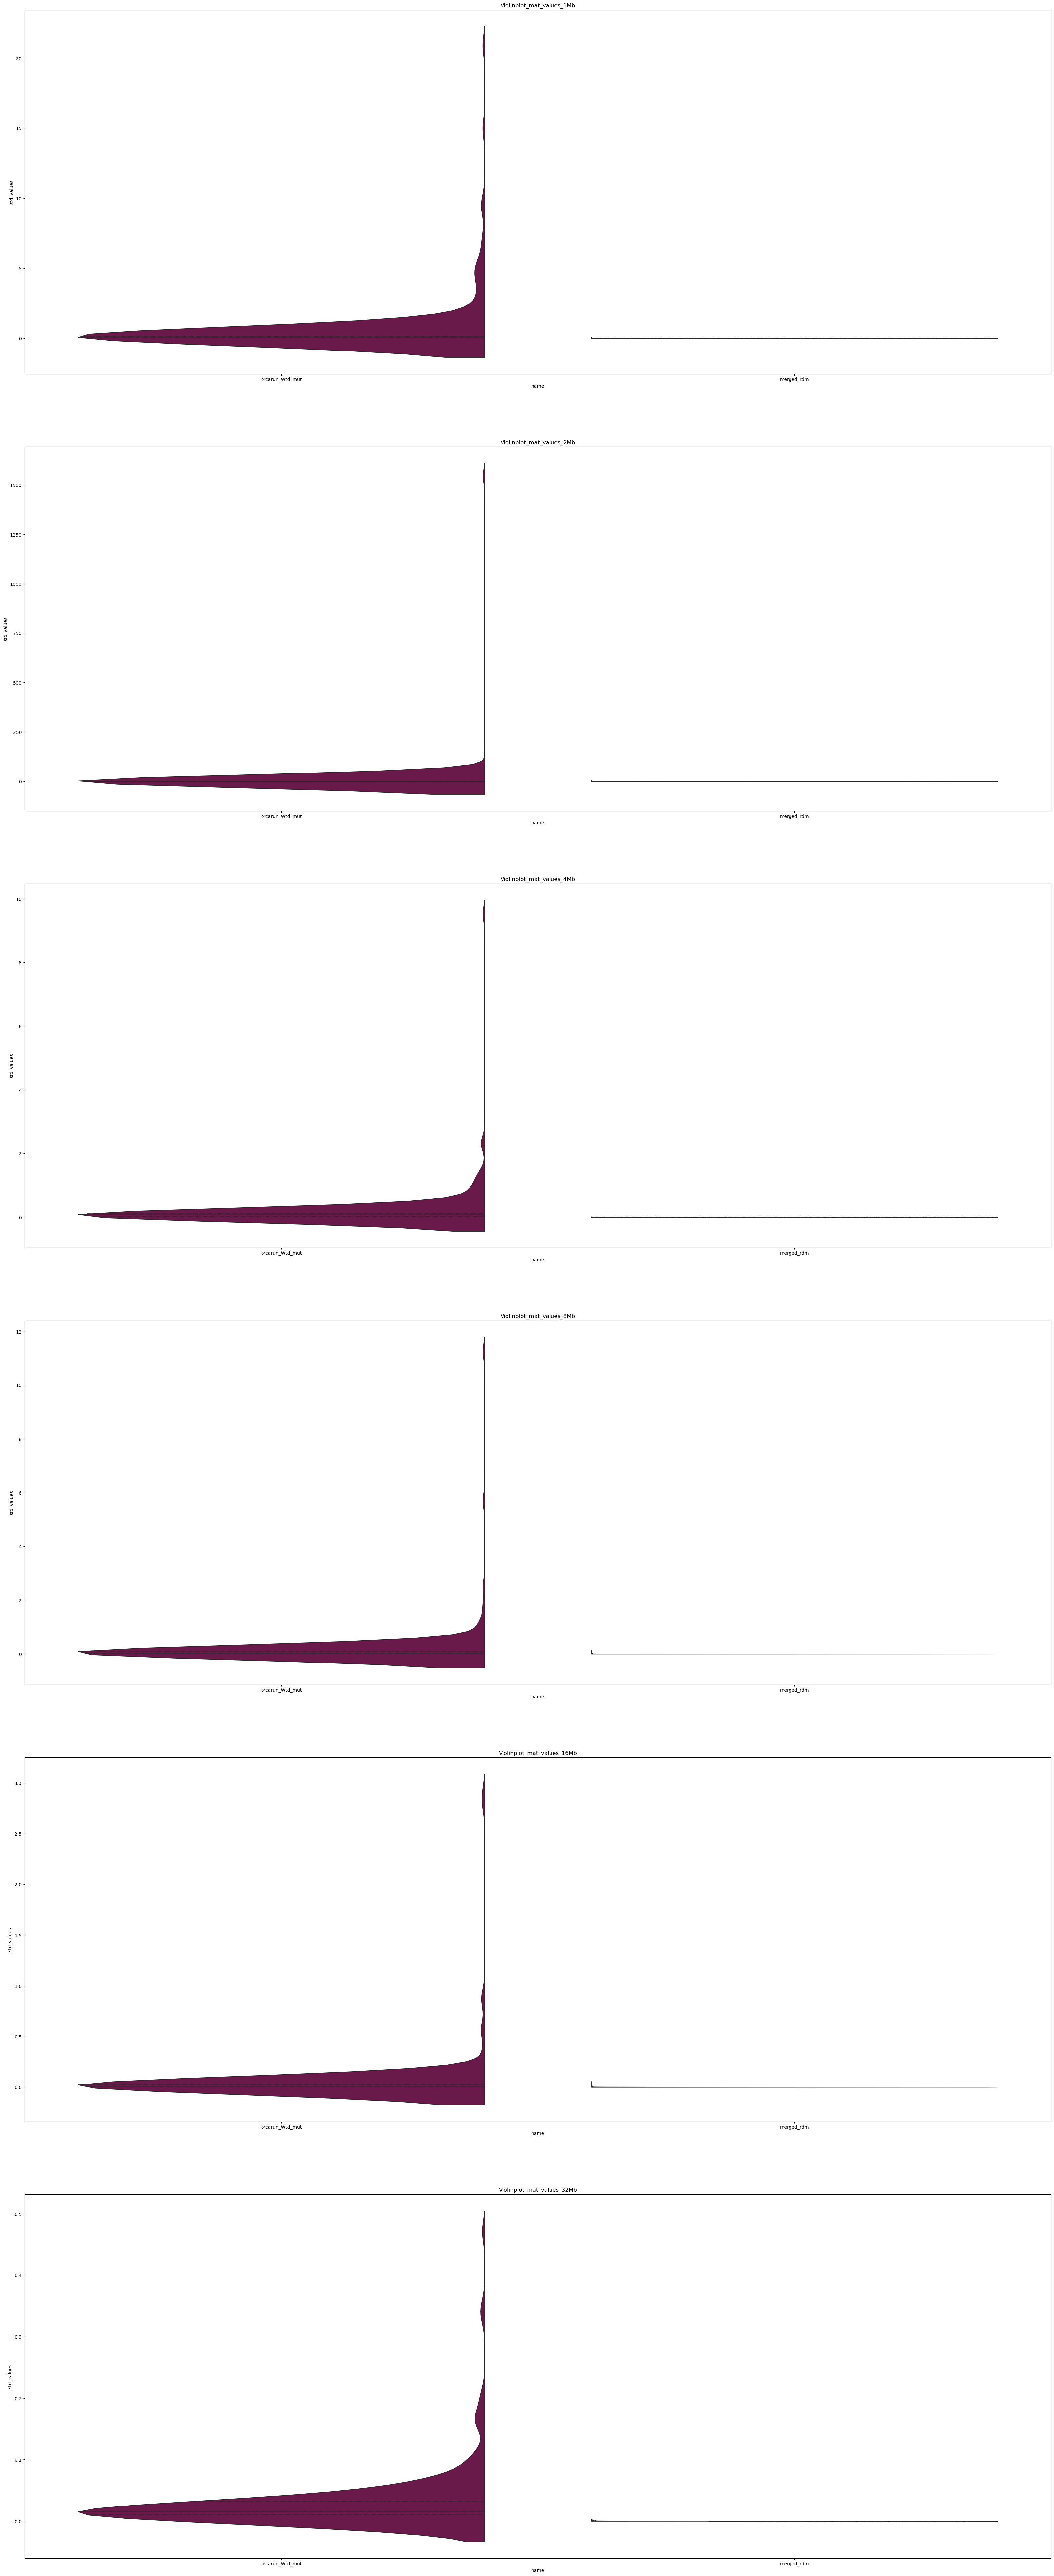

,name,resolution,data_type,values,reference,score_type,mutation_distance,run_name,std_values
0,orcarun_Wtd_mut,1Mb,matrix,0.021149,-0.064108,None,68,orcarun_Wtd_mut,0.329901
1,orcarun_Wtd_mut,1Mb,matrix,0.024654,-0.049031,None,67,orcarun_Wtd_mut,0.502825
2,orcarun_Wtd_mut,1Mb,matrix,0.024654,-0.049031,None,66,orcarun_Wtd_mut,0.502825
3,orcarun_Wtd_mut,1Mb,matrix,0.031853,-0.018057,None,65,orcarun_Wtd_mut,1.763977
4,orcarun_Wtd_mut,1Mb,matrix,0.031481,-0.019655,None,64,orcarun_Wtd_mut,1.601712
...,...,...,...,...,...,...,...,...,...
8995,merged_rdm,32Mb,matrix,0.000003,0.011569,None,95,orcarun_Rdm_mut_4,0.000298
8996,merged_rdm,32Mb,matrix,0.000004,0.020233,None,96,orcarun_Rdm_mut_4,0.000199
8997,merged_rdm,32Mb,matrix,0.000003,0.003600,None,97,orcarun_Rdm_mut_4,0.000811
8998,merged_rdm,32Mb,matrix,0.000003,-0.002604,None,98,orcarun_Rdm_mut_4,0.000961


In [5]:
mat_comparisons.dispersion_plot(data_type="matrix", merged="rdm")

Wtd_mut_1Mb : [68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148

/home/fforge/miniforge3/envs/orca_env/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 74.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/fforge/miniforge3/envs/orca_env/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 86.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/fforge/miniforge3/envs/orca_env/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 74.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/fforge/miniforge3/envs/orca_env/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 86.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/fforge

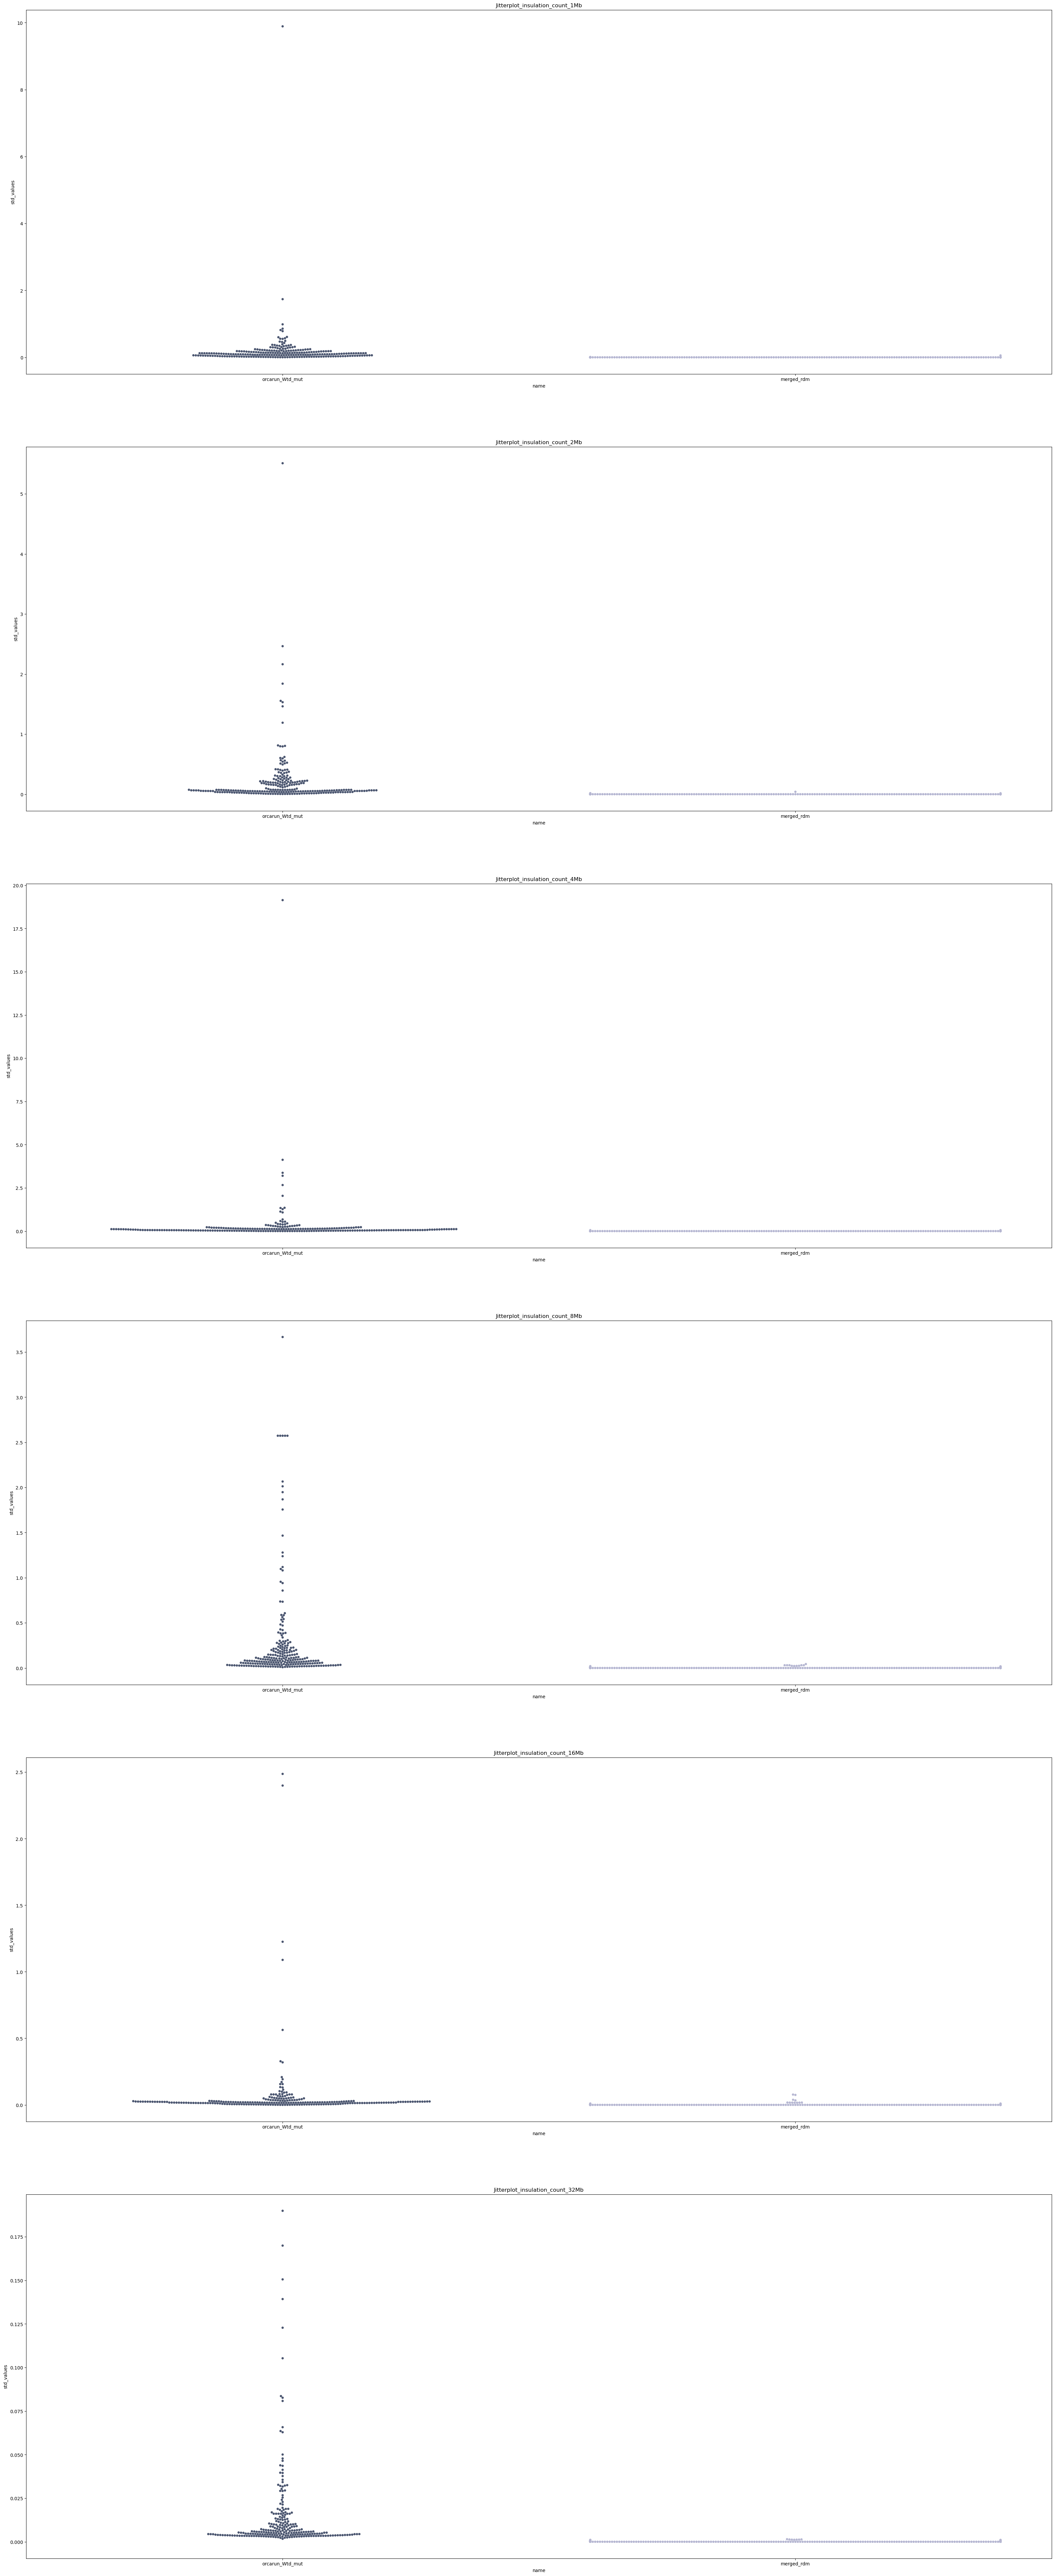

,name,resolution,data_type,values,reference,score_type,mutation_distance,run_name,std_values
0,orcarun_Wtd_mut,1Mb,score,0.006349,-0.083829,insulation_count,68,orcarun_Wtd_mut,0.075734
1,orcarun_Wtd_mut,1Mb,score,0.006349,-0.083829,insulation_count,67,orcarun_Wtd_mut,0.075734
2,orcarun_Wtd_mut,1Mb,score,0.006349,-0.083829,insulation_count,66,orcarun_Wtd_mut,0.075734
3,orcarun_Wtd_mut,1Mb,score,0.006349,-0.083829,insulation_count,65,orcarun_Wtd_mut,0.075734
4,orcarun_Wtd_mut,1Mb,score,0.006349,-0.083829,insulation_count,64,orcarun_Wtd_mut,0.075734
...,...,...,...,...,...,...,...,...,...
8815,merged_rdm,32Mb,score,0.000008,0.257762,insulation_count,90,orcarun_Rdm_mut_4,0.000031
8816,merged_rdm,32Mb,score,0.000005,0.212291,insulation_count,91,orcarun_Rdm_mut_4,0.000026
8817,merged_rdm,32Mb,score,0.000006,0.218325,insulation_count,92,orcarun_Rdm_mut_4,0.000027
8818,merged_rdm,32Mb,score,0.000006,0.219074,insulation_count,93,orcarun_Rdm_mut_4,0.000027


In [7]:
mat_comparisons.dispersion_plot(data_type="score", merged="rdm")

Wtd_mut_1Mb : [68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148

/home/fforge/miniforge3/envs/orca_env/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 74.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/fforge/miniforge3/envs/orca_env/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 86.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/fforge/miniforge3/envs/orca_env/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 74.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/fforge/miniforge3/envs/orca_env/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 86.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/fforge

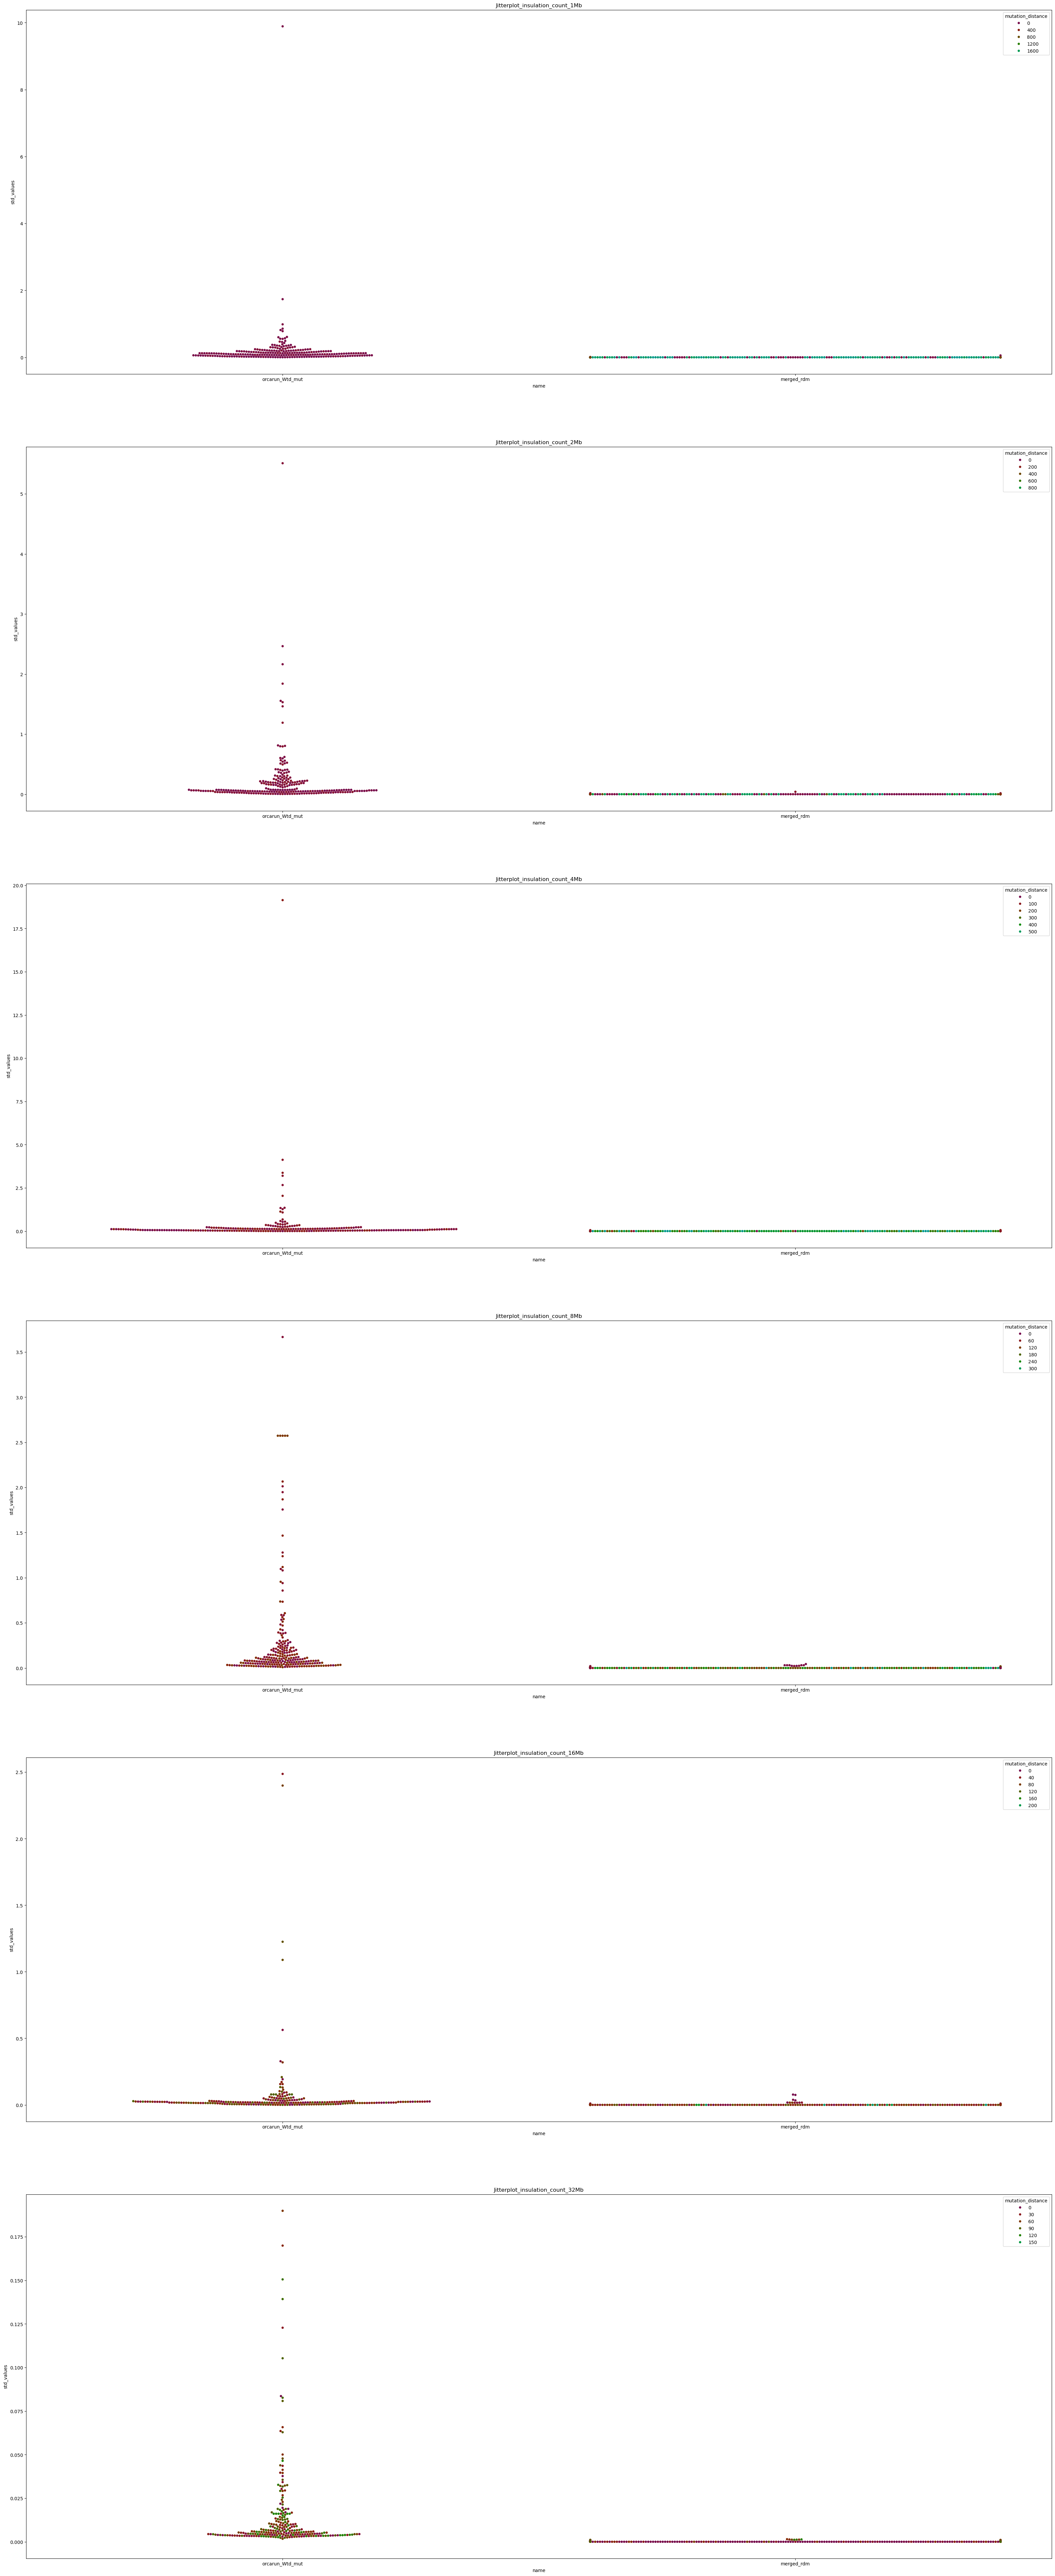

,name,resolution,data_type,values,reference,score_type,mutation_distance,run_name,std_values
0,orcarun_Wtd_mut,1Mb,score,0.006349,-0.083829,insulation_count,68,orcarun_Wtd_mut,0.075734
1,orcarun_Wtd_mut,1Mb,score,0.006349,-0.083829,insulation_count,67,orcarun_Wtd_mut,0.075734
2,orcarun_Wtd_mut,1Mb,score,0.006349,-0.083829,insulation_count,66,orcarun_Wtd_mut,0.075734
3,orcarun_Wtd_mut,1Mb,score,0.006349,-0.083829,insulation_count,65,orcarun_Wtd_mut,0.075734
4,orcarun_Wtd_mut,1Mb,score,0.006349,-0.083829,insulation_count,64,orcarun_Wtd_mut,0.075734
...,...,...,...,...,...,...,...,...,...
8815,merged_rdm,32Mb,score,0.000008,0.257762,insulation_count,90,orcarun_Rdm_mut_4,0.000031
8816,merged_rdm,32Mb,score,0.000005,0.212291,insulation_count,91,orcarun_Rdm_mut_4,0.000026
8817,merged_rdm,32Mb,score,0.000006,0.218325,insulation_count,92,orcarun_Rdm_mut_4,0.000027
8818,merged_rdm,32Mb,score,0.000006,0.219074,insulation_count,93,orcarun_Rdm_mut_4,0.000027


In [5]:
mat_comparisons.dispersion_plot(data_type="score", score_type = "insulation_count", merged="rdm", mut_dist=True)

# 

In [8]:
# mat_comparisons.heatmaps()

# 

In [9]:
# mat_comparisons.all_graphs()

# 

In [10]:
# mat_comparisons.correl_mat()

# 

In [11]:
# mat_comparisons.scores_regression()

In [12]:
# mat_comparisons.scores_regression(score_type="PC1")

In [13]:
# mat_comparisons.scores_regression(score_type="insulation_correl")

# 

In [14]:
# mat_comparisons.superposed_scatter(ftype=mat_comparisons.correl_mat)

In [15]:
# mat_comparisons.superposed_scatter(ftype=mat_comparisons.scores_regression)

In [16]:
# mat_comparisons.superposed_scatter(ftype=mat_comparisons.scores_regression, score_type="PC1")

In [ ]:
# mat_comparisons.superposed_scatter(ftype=mat_comparisons.scores_regression, score_type="insulation_correl")